David López Ujaque

In [4]:
# monto el drive local de colab para poder leer los archivos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# añade el path a tu directorio
#%cd /content/drive/MyDrive/UOC PACs/PAC3/
%cd /content/drive/MyDrive/Deep\ Learning/PRA/

/content/drive/MyDrive/Deep Learning/PRA


In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./practica_DL_UOC_2022/'):
    for filename in filenames:
        pass
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import glob
import matplotlib.pyplot as plt

from numpy import asarray
from PIL import Image
import tensorflow as tf

from tensorflow import keras
#from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

tf.random.set_seed(1)

# Sección 1. Análisis Exploratorio de los datos

In [10]:
# calculo el número de imágenes de test normal en todos los folds
test_normal_counter = 0
for result in glob.iglob('./practica_DL_UOC_2022/*/test/normal/*'):
    test_normal_counter +=1

    
# calculo el número de imágenes de test abnormal en todos los folds
test_abnormal_counter = 0
for result in glob.iglob('./practica_DL_UOC_2022/*/test/abnormal/*'):
    test_abnormal_counter +=1

print(f'número de imágenes normal para test: {test_normal_counter}')
print(f'número de imágenes abnormal para test: {test_abnormal_counter}')

dic_test = {}
dic_test['test_normal_counter'] = test_normal_counter
dic_test['test_abnormal_counter'] = test_abnormal_counter

número de imágenes normal para test: 929
número de imágenes abnormal para test: 831


In [12]:
print(dic_test)

{'test_normal_counter': 929, 'test_abnormal_counter': 831}


In [11]:
# calculo el número de imágenes de train normal en todos los folds
train_normal_counter = 0
for result in glob.iglob('./practica_DL_UOC_2022/*/train/normal/*'):
    train_normal_counter +=1

    
# calculo el número de imágenes de test abnormal en todos los folds
train_abnormal_counter = 0
for result in glob.iglob('./practica_DL_UOC_2022/*/train/abnormal/*'):
    train_abnormal_counter +=1

print(f'número de imágenes normal para train: {train_normal_counter}')
print(f'número de imágenes abnormal para train: {train_abnormal_counter}')

dic_train = {}
dic_train['test_normal_counter'] = train_normal_counter
dic_train['test_abnormal_counter'] = train_abnormal_counter

número de imágenes normal para train: 7516
número de imágenes abnormal para train: 6354


In [14]:
# calculo el número de imágenes de valid normal en todos los folds
valid_normal_counter = 0
for result in glob.iglob('./practica_DL_UOC_2022/*/valid/normal/*'):
    valid_normal_counter +=1

    
# calculo el número de imágenes de valid abnormal en todos los folds
valid_abnormal_counter = 0
for result in glob.iglob('./practica_DL_UOC_2022/*/valid/abnormal/*'):
    valid_abnormal_counter +=1

print(f'número de imágenes normal para valid: {valid_normal_counter}')
print(f'número de imágenes abnormal para valid: {valid_abnormal_counter}')

dic_valid = {}
dic_valid['test_normal_counter'] = train_normal_counter
dic_valid['test_abnormal_counter'] = train_abnormal_counter

número de imágenes normal para valid: 819
número de imágenes abnormal para valid: 721


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  del sys.path[0]


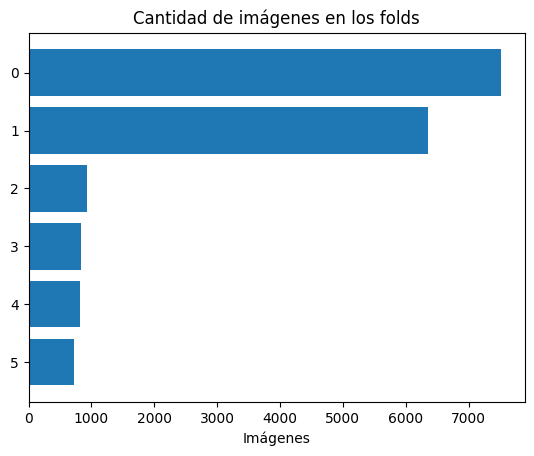

In [16]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
count = ('Train_normal', 'Train_abnormal', 'Test_Normal', 'Test_abnormal' , 'Valid_normal', 'Valid_abnormal')
number_images = [train_normal_counter, train_abnormal_counter,
                 test_normal_counter, test_abnormal_counter,
                 valid_normal_counter, valid_abnormal_counter]

y_pos = np.arange(len(count))
ax.barh(y_pos,number_images,  align='center')
#ax.set_yticks(y_pos, labels=count)
ax.set_yticks(y_pos, count)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Imágenes')
ax.set_title('Cantidad de imágenes en los folds')

plt.show()

In [ ]:
dic_results = {}

dic_results = {'train_normal_counter': train_normal_counter,
               'train_abnormal_counter': train_abnormal_counter,
               'test_normal_counter': test_normal_counter,
               'test_abnormal_counter': test_abnormal_counter,
               'valid_normal_counter': valid_normal_counter,
               'valid_abnormal_counter': valid_abnormal_counter
}
pd.DataFrame([dic_results])

# Sección 2. Entrenamiento de una red neuronal sobre una única partición

In [ ]:
fold0_test_normal = []
for dirname, _, filenames in os.walk('/kaggle/input/practica-dl-uoc-2022/practica_DL_UOC_2022/Fold0/test/normal'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        # load the image
        image = Image.open(os.path.join(dirname, filename))
        fold0_test_normal.append(asarray(image))

In [ ]:
# longitud del conjunto de datos
len(fold0_test_normal)

In [ ]:
#genero los labels para los test normal
fold0_test_normal_label = np.zeros(len(fold0_test_normal), dtype=int)
# longitud de los labels
len(fold0_test_normal_label)

In [ ]:
fold0_test_abnormal = []
for dirname, _, filenames in os.walk('/kaggle/input/practica-dl-uoc-2022/practica_DL_UOC_2022/Fold0/test/abnormal'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        # load the image
        image = Image.open(os.path.join(dirname, filename))
        fold0_test_abnormal.append(asarray(image))

In [ ]:
# longitud de los datos
len(fold0_test_abnormal)

In [ ]:
# genero los labels los test abnormal
fold0_test_abnormal_label = np.full(len(fold0_test_abnormal),1, dtype=int)
# print longitud de los labels
len(fold0_test_abnormal_label)

**Train**

In [ ]:
fold0_train_normal = []
for dirname, _, filenames in os.walk('/kaggle/input/practica-dl-uoc-2022/practica_DL_UOC_2022/Fold0/train/normal'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        # load the image
        image = Image.open(os.path.join(dirname, filename))
        fold0_train_normal.append(asarray(image))

In [ ]:
len(fold0_train_normal)

In [ ]:
# genero los labels del conjunto de entrenamiento de normal
fold0_train_normal_label = np.zeros(len(fold0_train_normal), dtype=int)
len(fold0_train_normal_label)

In [ ]:
fold0_train_abnormal = []
for dirname, _, filenames in os.walk('/kaggle/input/practica-dl-uoc-2022/practica_DL_UOC_2022/Fold0/train/abnormal'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        # load the image
        image = Image.open(os.path.join(dirname, filename))
        fold0_train_abnormal.append(asarray(image))

In [ ]:
len(fold0_train_abnormal)

In [ ]:
# genero los labels los test abnormal
fold0_train_abnormal_label = np.full(len(fold0_train_abnormal), 1, dtype=int)
len(fold0_train_abnormal_label)

**Valid**

In [ ]:
fold0_valid_normal = []
#for dirname, _, filenames in os.walk('/kaggle/input/practica-dl-uoc-2022/practica_DL_UOC_2022/Fold0/valid/normal'):
# solo estoy leyendo el fol0
for dirname, _, filenames in os.walk('/kaggle/input/practica-dl-uoc-2022/practica_DL_UOC_2022/Fold0/valid/normal'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        # load the image
        image = Image.open(os.path.join(dirname, filename))
        fold0_valid_normal.append(asarray(image))



In [ ]:
fold0_valid_normal[0].shape

In [ ]:
len(fold0_valid_normal)

In [ ]:
# genero los labels del conjunto de validación de normal
fold0_valid_normal_label = np.zeros(len(fold0_valid_normal), dtype=int)
len(fold0_valid_normal_label)

In [ ]:
fold0_valid_abnormal = []
#for dirname, _, filenames in os.walk('/kaggle/input/practica-dl-uoc-2022/practica_DL_UOC_2022/Fold0/valid/normal'):
# solo estoy leyendo el fol0
for dirname, _, filenames in os.walk('/kaggle/input/practica-dl-uoc-2022/practica_DL_UOC_2022/Fold0/valid/abnormal'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        # load the image
        image = Image.open(os.path.join(dirname, filename))
        fold0_valid_abnormal.append(asarray(image))

In [ ]:
len(fold0_valid_abnormal)

In [ ]:
# genero los labels del conjunto de validación de abnormal
fold0_valid_abnormal_label = np.full(len(fold0_valid_abnormal), 1, dtype=int)
len(fold0_valid_abnormal_label)

In [ ]:
#fold0_train_normal
#fold0_train_abnormal_label

print(len(fold0_train_normal))
print(len(fold0_train_normal_label))

print(np.shape(fold0_train_normal))
print(np.shape(fold0_train_abnormal))

fold0_train = np.concatenate((fold0_train_normal, fold0_train_abnormal), axis = 0)
fold0_train_label = np.concatenate((fold0_train_normal_label, fold0_train_abnormal_label), axis = 0)

print(np.shape(fold0_train))
print(np.shape(fold0_train_label))

In [ ]:
# borrar

len(fold0_train[0][0])

test = fold0_train[0]

# de array a image
pil_image=Image.fromarray(test)
pil_image

In [ ]:
#fold0_valid_normal
#fold0_valid_abnormal_label

print(len(fold0_valid_normal))
print(len(fold0_valid_normal_label))

print(np.shape(fold0_valid_normal))
print(np.shape(fold0_valid_abnormal))

fold0_valid = np.concatenate((fold0_valid_normal, fold0_valid_abnormal), axis = 0)
fold0_valid_label = np.concatenate((fold0_valid_normal_label, fold0_valid_abnormal_label), axis = 0)

print(np.shape(fold0_valid))
print(np.shape(fold0_valid_label))

In [ ]:
#fold0_train_normal
#fold0_train_abnormal_label

print(len(fold0_train_abnormal))
print(len(fold0_train_abnormal_label))

In [ ]:
from keras.layers import GlobalAveragePooling2D, BatchNormalization, Dropout, Dense
from keras import Model
from tensorflow.keras import layers

In [ ]:
#from tensorflow.keras.applications import EfficientNetB0
#
#
#b0_model = EfficientNetB0(weights = 'imagenet', input_shape=(224, 224, 3) , include_top = False)
#
#modelo = b0_model.output
#modelo = GlobalAveragePooling2D()(modelo)
#modelo = BatchNormalization()(modelo)
#modelo = Dropout(0.2)(modelo)
#modelo = Dense(2, activation='softmax') (modelo)
#
#modelo1 = Model(inputs = b0_model.input, outputs = modelo)

In [ ]:
#modelo1.summary()

In [ ]:
#for layer in modelo1.layers:
#    print(layer)

In [ ]:

# no borrar de momento!!!!
# aparentemente mejora el performance

#https://towardsdatascience.com/image-classification-transfer-learning-and-fine-tuning-using-tensorflow-a791baf9dbf3
    
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')
mixed_precision.global_policy()

In [ ]:
# Plot del training loss y el accuracy
# creo una funcion que imprime la curva de loss y de accuracy
def plot_prediction(mfit):
    plt.plot(mfit.history['accuracy'])
    plt.plot(mfit.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train_acc', 'Val_acc'], loc='lower right')
    plt.show()

    plt.plot(mfit.history['loss'])
    plt.plot(mfit.history['val_loss']) 
    plt.title('Model loss') 
    plt.ylabel('Loss') 
    plt.xlabel('Epoch') 
    plt.legend(['Train_loss', 'Val_loss'], loc='upper right') 
    plt.show()

In [ ]:
#modelo1.compile(optimizer=Adam(learning_rate=0.01),
#              loss='CategoricalCrossentropy',
#              metrics=['accuracy'])

In [ ]:
#epochs = 10  # @param {type: "slider", min:10, max:100}
#hist = modelo1.fit(fold0_train, fold0_train_label, epochs=epochs, validation_data=(fold0_valid, fold0_valid_label), verbose=2)

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers
#from tensorflow.keras.applications import EfficientNetB0

inputs = layers.Input(shape = (224,224, 3), name = 'inputLayer')

base_model = EfficientNetB0(weights = 'imagenet' , include_top = False)


# congelo el modelo pre entrenado
base_model.trainable = False
x = base_model(inputs, training = False)

#capas que añado
x = GlobalAveragePooling2D(name = 'avg_poolingLayer')(x)
x = BatchNormalization(name = 'bacthNormalization')(x)
x = Dropout(0.2, name = 'droput')(x)
outputs = Dense(1, activation = 'sigmoid', name = 'capa_salida')(x)

modelo1 = Model(inputs, outputs, name = 'Modelo1_EfficientNetB0')

In [ ]:
modelo1.summary()

In [ ]:
for lnum, layer in enumerate(modelo1.layers):
    print(lnum, layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

In [ ]:
##model.compile(Adam, loss = 'categorica_crossentropy', metrics = ['accuracy'])
#
modelo1.compile(optimizer=Adam(learning_rate=0.01),
              loss='binary_crossentropy',
                #loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#epochs = 10  # @param {type: "slider", min:10, max:100}
#hist = modelo1.fit(fold0_train, fold0_train_label, epochs=epochs, validation_data=(fold0_valid, fold0_valid_label), verbose=2)

In [ ]:
#plot_prediction(hist)

In [ ]:
#### test con imageDataGenerator
# https://towardsdatascience.com/keras-data-generators-and-how-to-use-them-b69129ed779c

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/practica-dl-uoc-2022/practica_DL_UOC_2022/Fold0/train/',
    target_size=(224, 224),
    batch_size=32,
    color_mode = 'rgb',
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    '/kaggle/input/practica-dl-uoc-2022/practica_DL_UOC_2022/Fold0/valid/',
    target_size=(224, 224),
    batch_size=32,
    color_mode = 'rgb',
    class_mode='binary')

In [ ]:
hist = modelo1.fit(train_generator,
                             epochs=100,
                             validation_data=validation_generator,
                             verbose=2)

#model1.fit_generator(
#    train_generator,
#    steps_per_epoch=2000,
#    epochs=50,
#    validation_data=validation_generator,
#    validation_steps=800)

In [ ]:
plot_prediction(hist)